In [67]:
import sklearn
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Loading Iris dataset

In [83]:
from sklearn import datasets

iris = sklearn.datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [84]:
#size of the dataset
X = iris.data #data
y = iris.target #targeted labels
flower_types = iris.target_names
features = iris.feature_names

In [85]:
X_shape = X.shape
y_shape = y.shape
print(f"Data shape: {X_shape}")
print(f"Label shape: {y_shape}")
print(f"Flower Types: {flower_types}")
print(f"Features: {features}")

Data shape: (150, 4)
Label shape: (150,)
Flower Types: ['setosa' 'versicolor' 'virginica']
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [86]:
#number of features
n = X_shape[1]
num_classes = len(set(y))
print(f"no. of features: {n}")

no. of features: 4


In [87]:
iris_dataframe = pd.DataFrame(data = iris.data, columns=iris.feature_names)
iris_dataframe['target'] = iris.target
iris_dataframe.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Visulizing the data

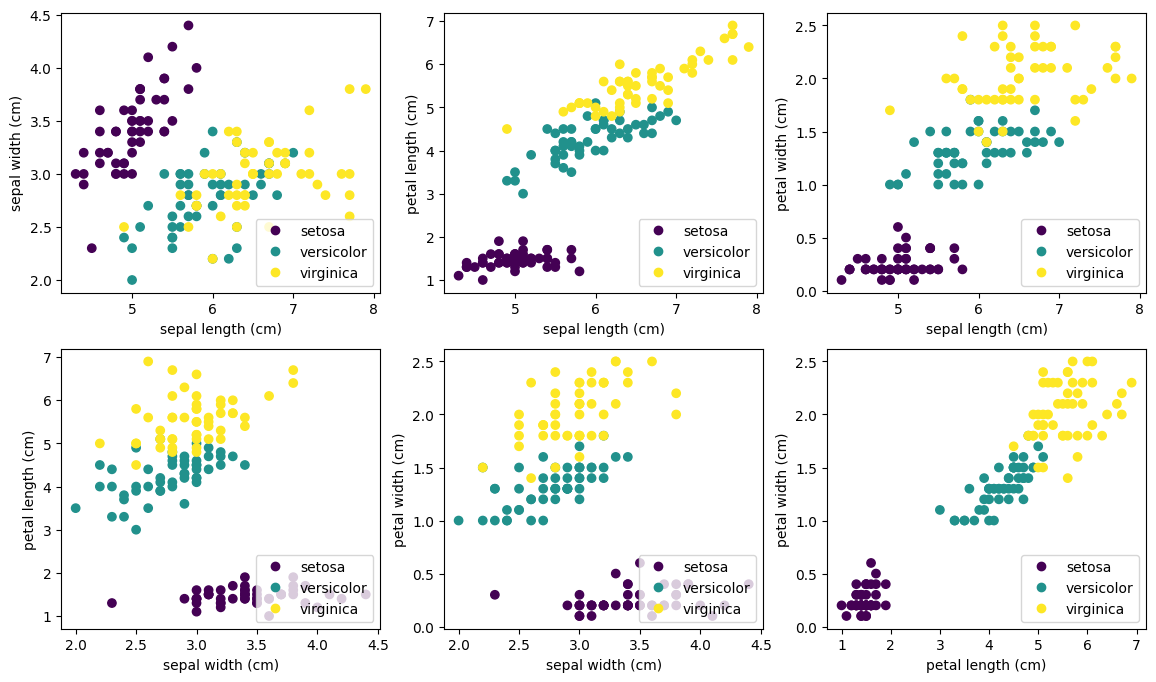

In [88]:
combinations = list(itertools.combinations((0,1,2,3), 2))
indexes = np.array([[0,0],[0,1],[0,2],[1,0],[1,1],[1,2]])

fig, axes = plt.subplots(2,3, figsize=(14,8))

for i in range(len(combinations)):
    scatter = axes[indexes[i,0], indexes[i,1]].scatter(X[:,combinations[i][0]], X[:,combinations[i][1]], c=y)
    axes[indexes[i,0], indexes[i,1]].set_xlabel(features[combinations[i][0]])
    axes[indexes[i,0], indexes[i,1]].set_ylabel(features[combinations[i][1]])
    #axes[indexes[i,0], indexes[i,1]].set_title(f"{features[combinations[i][0]]} VS. {features[combinations[i][1]]} plot")
    #axes[indexes[i,0], indexes[i,1]].legend(flower_types, loc="lower right")
    #.legend(axes.legend_elements()[0], flower_types, loc="lower right")
    fig = axes[indexes[i,0], indexes[i,1]].legend(scatter.legend_elements()[0], iris.target_names, loc="lower right")

    

Train the dataset using K-Nearest Neighbour clustering algorithm

In [89]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2)

In [90]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (120, 4)
X_test shape: (30, 4)
y_train shape: (120,)
y_test shape: (30,)


Method 1 - K-Nearest Neighbor Algorithm

In [91]:
#KNN model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_model = sklearn.neighbors.KNeighborsClassifier(n_neighbors = num_classes, weights = 'uniform')

In [92]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [93]:
prediction_knn = knn_model.predict(X_test)

Model Validation

In [94]:
accuracy_knn = (sklearn.metrics.accuracy_score(y_test, prediction_knn)) * 100
accuracy_knn_p = "{:.2f}".format(accuracy_knn)
print("accuracy of K-Nearest Neighbor algorithm: " + accuracy_knn_p + "%")

accuracy of K-Nearest Neighbor algorithm: 96.67%


Method 2 - Support Vector Machine 

In [95]:
from sklearn import svm

svm_model = svm.SVC()
svm_model.fit(X_train, y_train)

SVC()

In [96]:
prediction_svm = svm_model.predict(X_test)

In [97]:
accuracy_svm = sklearn.metrics.accuracy_score(y_test, prediction_svm)
accuracy_svm_p = "{:.2f}".format(accuracy_svm*100)
print("accuracy of Support Vector Machine Algorithm: " + accuracy_svm_p + "%")

accuracy of Support Vector Machine Algorithm: 96.67%
